
# 🛒 Análise de Faturamento e Vendas das Lojas

Este notebook apresenta uma análise exploratória dos dados de vendas de quatro lojas diferentes, com foco em:
- Faturamento total por loja e categoria
- Avaliações médias por loja
- Produtos mais e menos vendidos
- Custo médio de frete
- Visualizações gráficas para insights de negócio

Os dados foram obtidos do repositório oficial do Challenge de Data Science da Alura.


In [6]:
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
import seaborn as sns

# URLs dos dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Lê todas as lojas em um único DataFrame
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Conversões de tipo
df_total["Preço"] = df_total["Preço"].astype(float)
df_total["Frete"] = df_total["Frete"].astype(float)
df_total["Quantidade de parcelas"] = df_total["Quantidade de parcelas"].astype(int)


In [ ]:
# Verificando as 5 primeiras e as 5 últmas linhas do DataFrame das Lojas para entender a estrutura dos dados

for i in range(1, 5):
    print(f"===== INFORMAÇÕES DOS DADOS LOJA {i} =====")
    display(df_total[df_total["Loja"] == f"Loja {i}"])

## 💰 Faturamento Total por Loja

In [9]:
# Calcular faturamento por loja
print("\n===== ANÁLISE DE FATURAMENTO =====")

# Criar DataFrame para armazenar faturamento por loja
faturamento_df = pd.DataFrame(df_total.groupby("Loja")["Preço"].sum()).reset_index()
faturamento_df.rename(columns={"Preço": "Faturamento Total"}, inplace=True)
faturamento_df["Percentual"] = (faturamento_df["Faturamento Total"] / faturamento_df["Faturamento Total"].sum()) * 100
faturamento_df.sort_values(by="Faturamento Total", ascending=False, inplace=True)

# Formatar valores
faturamento_df["Faturamento Total"] = faturamento_df["Faturamento Total"].map("R$ {:,.2f}".format)
faturamento_df["Percentual"] = faturamento_df["Percentual"].map("{:.1f}%".format)

# Calcular faturamento total de todas as lojas
faturamento_geral = df_total["Preço"].sum()

# Exibir resultados
display(faturamento_df)

# Exibir faturamento total geral com formatação
print(f"\nFaturamento Total de todas as lojas: R$ {faturamento_geral:,.2f}")


===== ANÁLISE DE FATURAMENTO =====


,Loja,Faturamento Total,Percentual
0,Loja 1,"R$ 1,534,509.12",26.1%
1,Loja 2,"R$ 1,488,459.06",25.4%
2,Loja 3,"R$ 1,464,025.03",24.9%
3,Loja 4,"R$ 1,384,497.58",23.6%



Faturamento Total de todas as lojas: R$ 5,871,490.79


## 📦 Vendas por Categoria (Preço × Parcelas)

In [10]:
from collections import defaultdict

# Inicializa um dicionário para armazenar o total de vendas por categoria
vendas_por_categoria_total = defaultdict(float)

# Agrupando dados por loja e categoria
for loja_nome, loja_df in df_total.groupby("Loja"):
    loja_df["Preço"] = loja_df["Preço"].astype(float)  # Garantindo que os preços sejam numéricos
    categorias = loja_df.groupby("Categoria do Produto")["Preço"].sum()

    print(f"\n🔹 Vendas por categoria na {loja_nome}:")
    print(categorias.map("R$ {:,.2f}".format))  # Aplicando formatação diretamente na saída

    for categoria, valor in categorias.items():
        vendas_por_categoria_total[categoria] += valor

# Mostrar vendas totais por categoria
print("\n📊 Vendas totais por categoria (todas as lojas):")
for categoria, valor in vendas_por_categoria_total.items():
    print(f"  ✅ {categoria}: R$ {valor:,.2f}")

# Total geral de vendas
total_geral = sum(vendas_por_categoria_total.values())
print(f"\n💰 Total geral de vendas: R$ {total_geral:,.2f}")


🔹 Vendas por categoria na Loja 1:
Categoria do Produto
brinquedos                R$ 23,993.78
eletrodomesticos         R$ 484,913.36
eletronicos              R$ 572,659.23
esporte e lazer           R$ 52,387.55
instrumentos musicais    R$ 121,731.69
livros                    R$ 11,713.92
moveis                   R$ 250,178.11
utilidades domesticas     R$ 16,931.48
Name: Preço, dtype: object

🔹 Vendas por categoria na Loja 2:
Categoria do Produto
brinquedos                R$ 21,262.21
eletrodomesticos         R$ 464,758.13
eletronicos              R$ 547,773.71
esporte e lazer           R$ 46,326.09
instrumentos musicais    R$ 139,987.03
livros                    R$ 13,454.35
moveis                   R$ 235,234.68
utilidades domesticas     R$ 19,662.86
Name: Preço, dtype: object

🔹 Vendas por categoria na Loja 3:
Categoria do Produto
brinquedos                R$ 25,869.20
eletrodomesticos         R$ 438,984.89
eletronicos              R$ 547,699.92
esporte e lazer           R$ 47,456.1

## ⭐ Avaliação Média por Loja

In [3]:
# Lê todas as lojas em um único DataFrame e adiciona a identificação da loja
df_total = pd.concat([pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)], ignore_index=True)

# Cálculo da média de avaliação de cada loja
avaliacoes = df_total.groupby("Loja")["Avaliação da compra"].mean().sort_values(ascending=False)

# Exibindo os resultados
for loja, media in avaliacoes.items():
    print(f"Média de Avaliação - {loja}: {media:.2f}")

Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 4: 4.00
Média de Avaliação - Loja 1: 3.98


## 🔝 Produtos que Mais e Menos Geraram Receita por Loja

In [ ]:
# Iterar por cada loja única no DataFrame
for loja in df_total["Loja"].unique():
    # Agrupar produtos e somar faturamento
    produtos_loja = df_total[df_total["Loja"] == loja].groupby("Produto")["Preço"].sum()

    # Ordenação para encontrar os TOP 3 mais e menos vendidos
    top_3 = produtos_loja.sort_values(ascending=False).head(3).map("R$ {:,.2f}".format)
    bottom_3 = produtos_loja.sort_values().head(3).map("R$ {:,.2f}".format)

    # Exibição formatada
    print(f"\n🏆 {loja} - **TOP 3 MAIS vendidos**:")
    print(top_3.to_string())  # Exibição mais legível

    print(f"\n📉 {loja} - **TOP 3 MENOS vendidos**:")
    print(bottom_3.to_string())  # Exibição mais legível


🏆 Loja 1 - **TOP 3 MAIS vendidos**:
Produto
TV Led UHD 4K       R$ 189,534.28
Geladeira           R$ 149,524.28
Celular Plus X42    R$ 130,536.40

📉 Loja 1 - **TOP 3 MENOS vendidos**:
Produto
Corda de pular     R$ 870.89
Dinossauro Rex     R$ 918.40
Cubo mágico 8x8    R$ 929.27

🏆 Loja 2 - **TOP 3 MAIS vendidos**:
Produto
Celular Plus X42    R$ 150,967.83
TV Led UHD 4K       R$ 137,833.06
Geladeira           R$ 130,176.48

📉 Loja 2 - **TOP 3 MENOS vendidos**:
Produto
Cubo mágico 8x8      R$ 858.22
Dinossauro Rex     R$ 1,027.41
Corda de pular     R$ 1,142.54

🏆 Loja 3 - **TOP 3 MAIS vendidos**:
Produto
Geladeira           R$ 133,185.99
TV Led UHD 4K       R$ 128,892.11
Celular Plus X42    R$ 124,300.84

📉 Loja 3 - **TOP 3 MENOS vendidos**:
Produto
Cubo mágico 8x8      R$ 853.81
Dinossauro Rex     R$ 1,060.78
Corda de pular     R$ 1,137.76

🏆 Loja 4 - **TOP 3 MAIS vendidos**:
Produto
Celular Plus X42    R$ 128,930.07
TV Led UHD 4K       R$ 120,393.25
Smart TV            R$ 110,387.57



In [ ]:
# Encontrando os produtos mais e menos vendidos por loja
for i in range(1, 5):
    df_loja = df_total[df_total["Loja"] == f"Loja {i}"]

    produto_mais_vendido = df_loja['Produto'].value_counts().idxmax()
    produto_menos_vendido = df_loja['Produto'].value_counts().idxmin()

    print(f"Loja {i} - Mais vendido: {produto_mais_vendido}")
    print(f"Loja {i} - Menos vendido: {produto_menos_vendido}")

# Produto mais vendido geral
produto_mais_vendido_geral = df_total['Produto'].value_counts().idxmax()
print("O produto mais vendido foi:", produto_mais_vendido_geral)

# Produto menos vendido geral
produto_menos_vendido_geral = df_total['Produto'].value_counts().idxmin()
print("O produto menos vendido foi:", produto_menos_vendido_geral)

Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programação
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra
O produto mais vendido foi: Cômoda
O produto menos vendido foi: Celular ABXY


## 🚚 Frete Médio por Loja

In [ ]:
# Calcular frete médio por loja e ordenar do menor para o maior
frete_medio = df_total.groupby("Loja")["Frete"].mean().sort_values()

# Aplicar formatação monetária
frete_medio_formatado = frete_medio.map("R$ {:,.2f}".format)

# Exibir resultado de forma organizada
print("\n🚚 Frete médio por loja:")
print(frete_medio_formatado.to_string())


🚚 Frete médio por loja:
Loja
Loja 4    R$ 31.28
Loja 3    R$ 33.07
Loja 2    R$ 33.62
Loja 1    R$ 34.69


### Gráfico Custo Médio de Frete por Loja

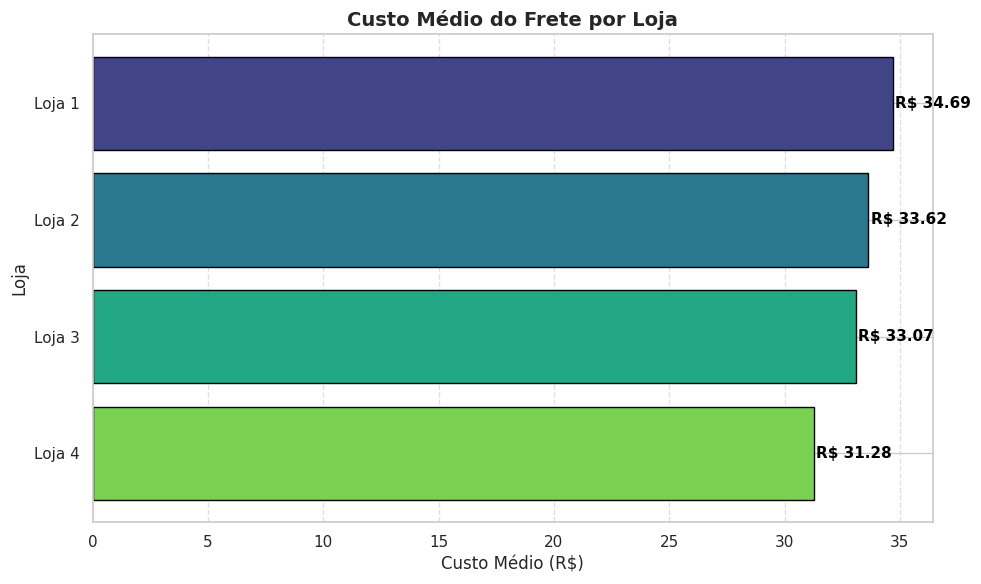

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Calcular o custo médio do frete por loja
frete_medio_loja = df_total.groupby("Loja")["Frete"].mean().sort_values(ascending=False)

# Criar o gráfico de barras horizontais com melhorias visuais
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(frete_medio_loja))  # Paleta de cores elegante
bars = plt.barh(frete_medio_loja.index, frete_medio_loja.values, color=colors, edgecolor="black")

# Adicionar valores ao lado das barras
for bar, value in zip(bars, frete_medio_loja.values):
    plt.text(value + 0.1, bar.get_y() + bar.get_height()/2, f"R$ {value:,.2f}",
             va='center', fontsize=11, fontweight="bold", color="black")

# Adicionar título e rótulos personalizados
plt.title('Custo Médio do Frete por Loja', fontsize=14, fontweight="bold")
plt.xlabel('Custo Médio (R$)', fontsize=12)
plt.ylabel('Loja', fontsize=12)

# Melhorar a visualização
plt.gca().invert_yaxis()  # Mantém a ordem das lojas correta
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Exibir o gráfico
plt.show()

## 📊 Visualizações Gráficas

### Gráfico 1. Faturamento Total por Loja

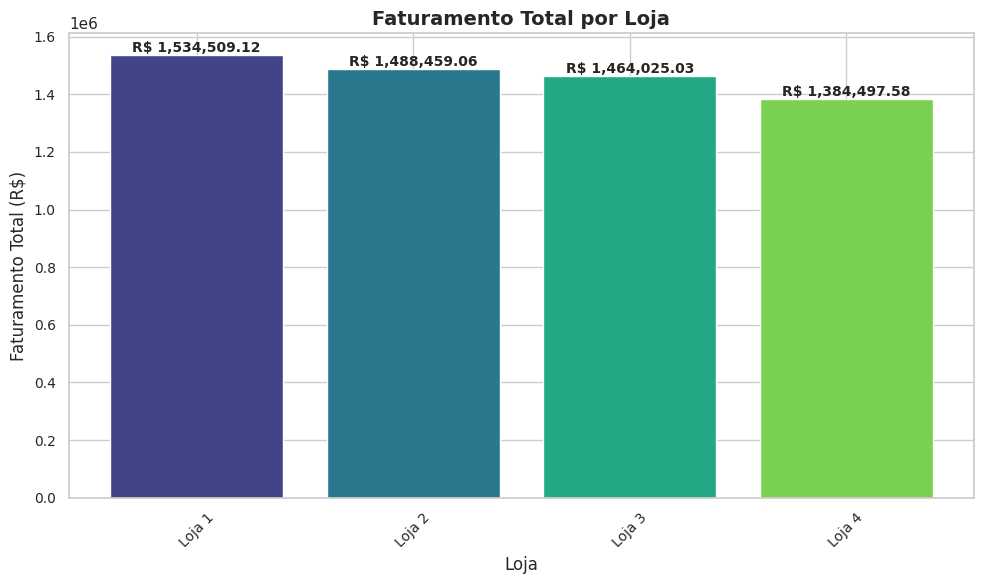

In [11]:
# Configuração do estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# Convertendo os valores para formato numérico
valores_faturamento = faturamento_df["Faturamento Total"].str.replace("R$ ", "").str.replace(",", "").astype(float)

# Criando o gráfico de barras com cores vibrantes
colors = sns.color_palette("viridis", len(faturamento_df))
bars = plt.bar(faturamento_df["Loja"], valores_faturamento, color=colors)

# Adicionando os valores no topo das barras
for bar, valor in zip(bars, valores_faturamento):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configuração do título e rótulos
plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.ylabel("Faturamento Total (R$)", fontsize=12)
plt.xlabel("Loja", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Gráfico 2. Participação das Lojas no Faturamento Total

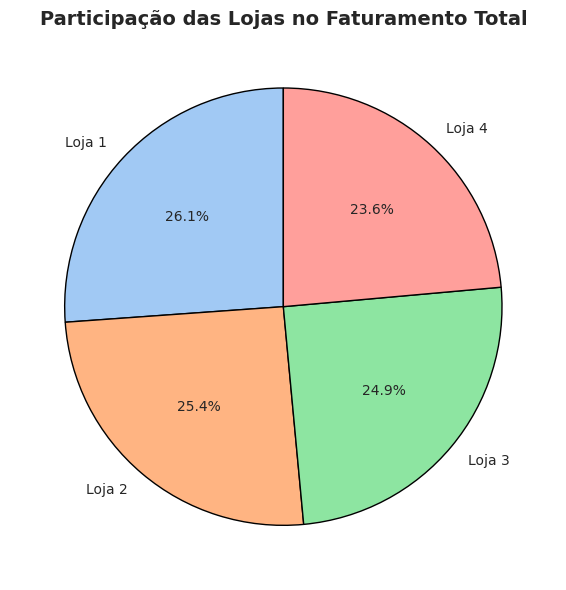

In [ ]:
# Configuração do estilo
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# Criando o DataFrame corretamente
faturamento_total = df_total.groupby("Loja")["Preço"].sum()

# Criando gráfico de pizza com porcentagem formatada
colors = sns.color_palette("pastel", len(faturamento_total))
plt.pie(faturamento_total, labels=faturamento_total.index, autopct=lambda p: f"{p:.1f}%", startangle=90, colors=colors, wedgeprops={"edgecolor": "black"})

# Configuração do título
plt.title("Participação das Lojas no Faturamento Total", fontsize=14, fontweight="bold")

# Melhorando o layout
plt.tight_layout()
plt.show()

### Gráfico 3. Receita Média por Venda

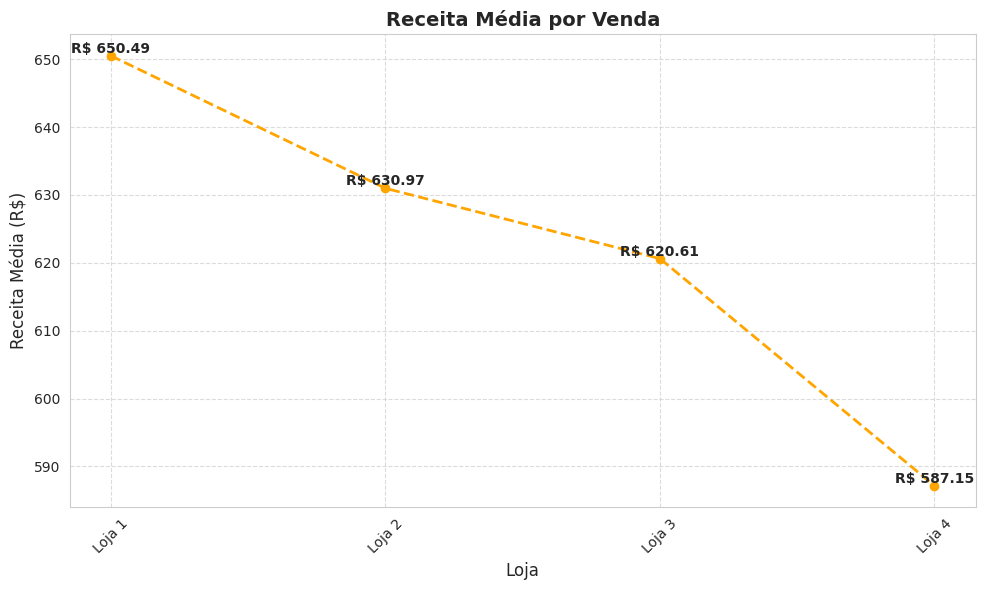

In [ ]:
plt.figure(figsize=(10,6))

# Criando o DataFrame corretamente
receita_media = df_total.groupby("Loja")["Preço"].mean()

plt.plot(receita_media.index, receita_media, marker='o', linestyle='--', color='orange', linewidth=2)

# Adicionando rótulos nos pontos
for loja, valor in zip(receita_media.index, receita_media):
    plt.text(loja, valor, f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Receita Média por Venda", fontsize=14, fontweight="bold")
plt.ylabel("Receita Média (R$)", fontsize=12)
plt.xlabel("Loja", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 📌 Conclusão

### Comparação de Lojas

| **Métrica**             | 🏬 **Loja 1**     | 🏬 **Loja 2**           | 🏬 **Loja 3**     | 🏬 **Loja 4**     |
|-------------------------|------------------|------------------------|------------------|------------------|
| 💰 **Faturamento Total** | **1.534.509**    | 1.488.459              | 1.464.025        | 🔥 **1.384.498** |
| ⭐ **Média de Avaliação** | 3.98             | 4.04                    | **4.05**         | 4.00             |
| 🚚 **Frete Médio (R$)**  | 34.69            | 33.62                   | 33.07            | 🎯 **31.28**     |
| 🏆 **Categoria + Popular**| Móveis           | Móveis                  | Móveis           | Móveis           |
| 🔝 **Produto + Vendido**  | TV Led UHD 4K    | Iniciando em programação| Kit banquetas    | Cama box         |
| 🔻 **Produto - Vendido**  | Headset          | Jogo de tabuleiro       | Blocos de montar | Guitarra         |


### Resultado da Análise

A loja recomendada para venda é a **Loja 4**, com base nos seguintes critérios:
- Menor **faturamento total**
- Avaliação inferior em relação às lojas 2 e 3
- Frete médio mais baixo, mas sem impacto relevante frente ao desempenho financeiro
- Não se destaca em nenhuma das métricas-chave analisadas em relação as outras lojas
- É importante ressaltar que outras análises complementares podem ser realizadas, essas análises adicionais podem fornecer insights ainda mais valiosos para a tomada de decisão.

Portanto, recomenda-se que o Sr. João venda a Loja 4, pois ela apresenta o desempenho mais fraco entre as quatro lojas analisadas, permitindo que ele invista o capital obtido em um novo negócio com maior potencial de retorno.